# Heart disease data set \- Data preprocessing

The heart disease data set contains information about patients and heart diseases related with chest pain, high blood pressure, heart rate. Coronary heart disease is the most common form of cardiovascular disease, it reduces blood flow to the heart muscle due to build\-up of plaque in the arteries of the heart.

- age         Age \(years\)
- gender    Gender \(0: female, 1: male\)
- cp            Chest pain type
- trestbps   Resting blood pressure \(in mm Hg on admission to the hospital\)
- chol         Serum cholesterol in mg/dl
- fbs           Fasting blood sugar &gt; 120 mg/dl\) \(0: false, 1: true\)
- restecg    Resting electrocardiographic results
- thalach    Maximum heart rate
- exang      Exercise induced angina \(0: no 1: yes\)
- oldpeak   ST depression induced by exercise relative to rest
- slope      The slope of the peak exercise ST segment
- ca           Number of major vessels \(0\-3\) colored by flouroscopy
- thal         3 = normal; 6 = fixed defect; 7 = reversable defect
- target     0: no heart disease, 1: heart disease


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('heart_disease_raw.csv')

In [78]:
# datat columns, rows, and daa types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   gender    1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [79]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
#shows pateints with colestestoral over 500 these are outliers
df[df.chol >= 500]

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [81]:
#drops rows with cholesterol over 500, since these values are considered outliers
df.drop(df[df.chol >= 500].index, inplace=True)

In [82]:
df.describe()


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1022.000000,1022.000000,1022.000000,1022.00000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,54.397260,0.697652,0.939335,131.66047,245.066536,0.149706,0.531311,149.082192,0.337573,1.069961,1.386497,0.756360,2.321918,0.511742
std,9.059965,0.459500,1.029553,17.51924,48.699115,0.356958,0.527870,23.031918,0.473114,1.176429,0.618308,1.031499,0.620487,0.500107
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [83]:
# count unique values
df.nunique()

age          41
gender        2
cp            4
trestbps     49
chol        151
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [84]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [85]:
#totals by gender (0 is female, 1 is male)
df['gender'].value_counts().loc[[0,1]]

gender
0    309
1    713
Name: count, dtype: int64

In [86]:
# Are men or women more likely to have a heart disease?

# percentage of women with heart disease

total_women = len(df[(df['gender']==0)].index)
women_heart_disease = len(df[(df['target']==1) & (df['gender']==0)].index)
women_no_disease = total_women - women_heart_disease

# percentage of men with heart disease

total_men = len(df[(df['gender']==1)].index)
men_heart_disease = len(df[(df['target']==1) & (df['gender']==1)].index)
men_no_disease = total_men - men_heart_disease

print('Women ', women_heart_disease/total_women)
print('Men', men_heart_disease/total_men)

Women  0.7216828478964401
Men 0.42075736325385693


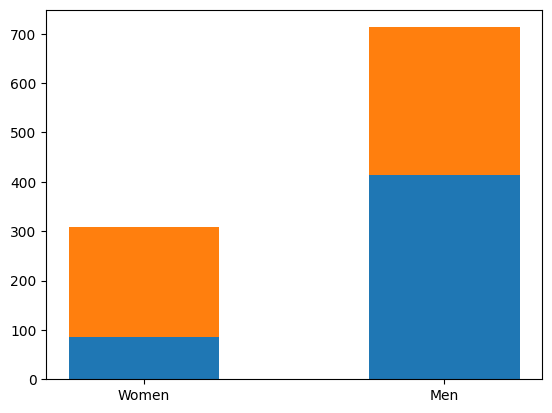

In [87]:
# heart disease: men vs. women

gender = ('Women', 'Men')

target_counts = {
    '0': np.array([women_no_disease, men_no_disease]),
    '1': np.array([women_heart_disease, men_heart_disease]),
}

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, target_count in target_counts.items():
    p = ax.bar(gender, target_count, width, label=boolean, bottom=bottom)
    bottom += target_count

plt.show()



## Heart disease: Men vs. Women

Heart disease is the leading cause of death for women in the United States and can affect women at any age. Over 60 million women \(44%\) in the United States are living with some form of heart disease. Heart disease is women number 1 killer. In 2021, it was responsible for the deaths of 310,661 women \(about 1 in every 5 female deaths\).

https://www.cdc.gov/heartdisease/women.html 

[https://www.verywellhealth.com/heart\-disease\-men\-vs\-women\-4126017](https://www.verywellhealth.com/heart-disease-men-vs-women-4126017) 



In [88]:
#totals by heart disease
df['target'].value_counts().loc[[0,1]]

target
0    499
1    523
Name: count, dtype: int64

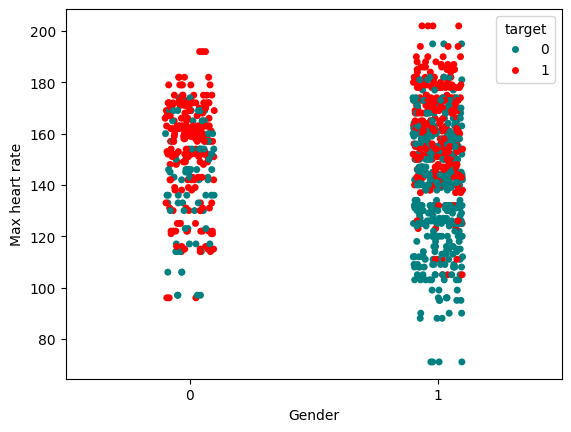

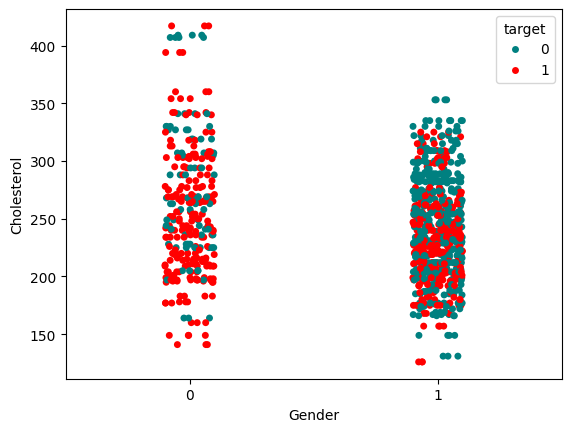

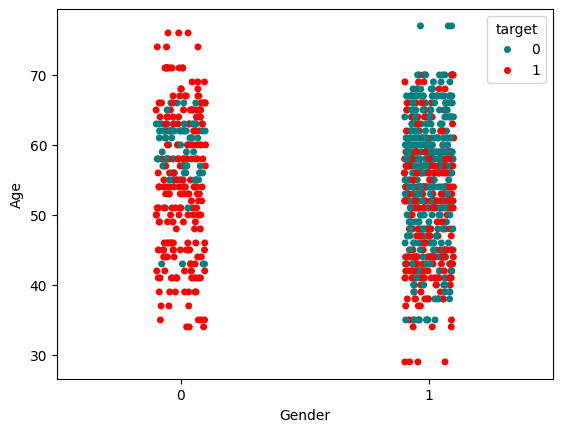

In [89]:
# What patients are more likely to have a heart disease?

# Is this related with gender?
# Is this related with cholesterol?
# Is this related with age?

# a strip plot is a scatter plot based on categories

colors = ['teal', 'red']

sns.stripplot(x='gender', y='thalach', hue='target', data=df, palette=colors)
plt.xlabel('Gender')
plt.ylabel('Max heart rate')
plt.show()

sns.stripplot(x='gender', y='chol', hue='target', data=df, palette=colors)
plt.xlabel('Gender')
plt.ylabel('Cholesterol')
plt.show()

sns.stripplot(x='gender', y='age', hue='target', data=df, palette=colors)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

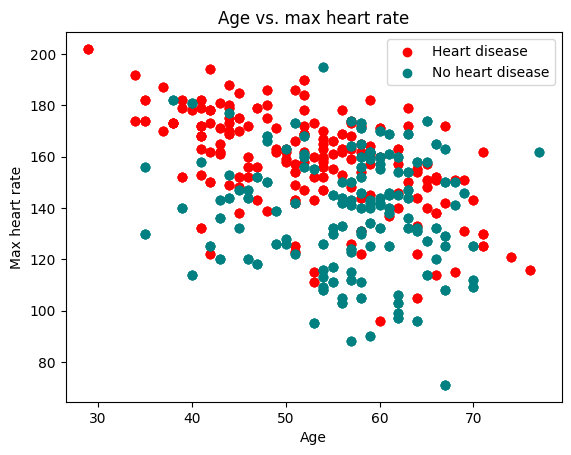

In [90]:
# scatter plot showing Age vs. Max heart rate and heart disease

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='red')   # heart disease
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='teal')  # no heart disease

plt.title('Age vs. max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Heart disease', 'No heart disease'])

plt.show()


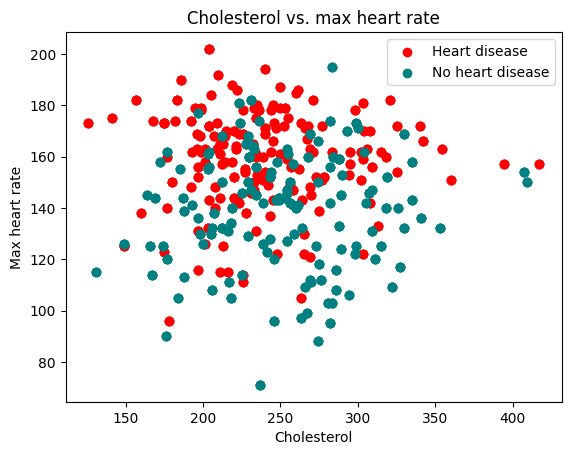

In [91]:
# scatter plot showing Cholesterol vs. Max heart rate and heart disease

plt.scatter(df.chol[df.target==1], df.thalach[df.target==1], c='red')   # heart disease
plt.scatter(df.chol[df.target==0], df.thalach[df.target==0], c='teal')  # no heart disease

plt.title('Cholesterol vs. max heart rate')
plt.xlabel('Cholesterol')
plt.ylabel('Max heart rate')
plt.legend(['Heart disease', 'No heart disease'])

plt.show()

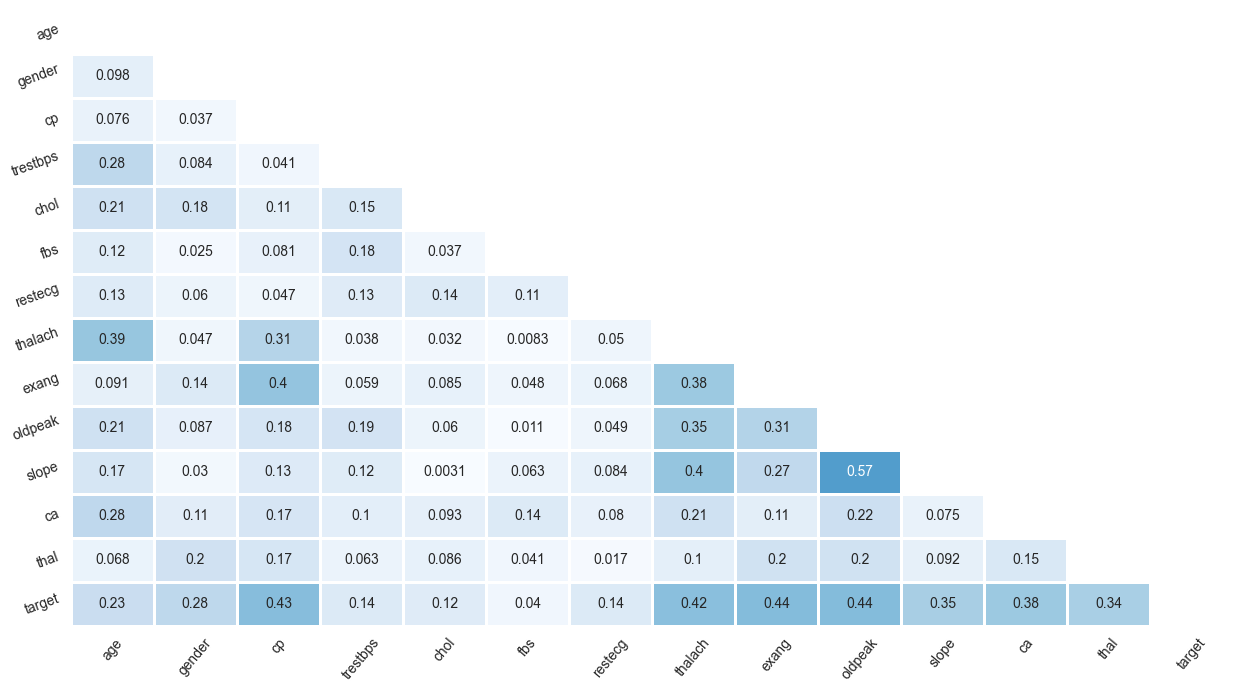

In [92]:
# correlation matrix

correlation = abs(df.corr())

# select the lower triangle of the correlation matrix and mask the upper triangle

triangle = np.tril(correlation, k=-1)
mask = triangle == 0

# plot size

plt.figure(figsize=(15,8))

# set white grid lines

sns.set_style(style = 'white')

# heat map

sns.heatmap(triangle, center=0.5, cmap='Blues', annot=True, xticklabels=correlation.index, yticklabels=correlation.columns, cbar=False, linewidths=1, mask=mask)
plt.xticks(rotation = 50)
plt.yticks(rotation = 20)
plt.show()

In [93]:
#save the data set
df.to_csv('heart_disease.csv', index=False)